In [ ]:
import pandas as pd

# Load the dataset
file_path = 'amd.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2.714688e+09
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,5.104800e+08
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,3.432000e+08
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,2.443680e+08
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,2.275200e+08


In [ ]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values
missing_values_after_ffill = data.isnull().sum()

missing_values_after_ffill

/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_11460/1193937834.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Display basic statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,6388,6388.000000,6388.000000,6388.000000,6388.000000,6388.000000,6.388000e+03
mean,2011-10-01 22:14:16.606136576,5.594538,5.696704,5.487489,5.599052,5.572546,6.075978e+08
min,1999-01-22 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,1.968000e+07
25%,2005-05-30 00:00:00,0.276750,0.285417,0.268687,0.275729,0.252906,3.480488e+08
50%,2011-09-29 12:00:00,0.455000,0.462375,0.447125,0.455125,0.424362,5.096160e+08
75%,2018-02-05 06:00:00,4.118938,4.163938,4.040438,4.110000,4.068850,7.373910e+08
max,2024-06-11 00:00:00,124.047997,125.586998,118.320000,122.440002,122.429947,9.230856e+09
std,NaN,13.724878,13.972751,13.454487,13.740316,13.742472,4.328772e+08


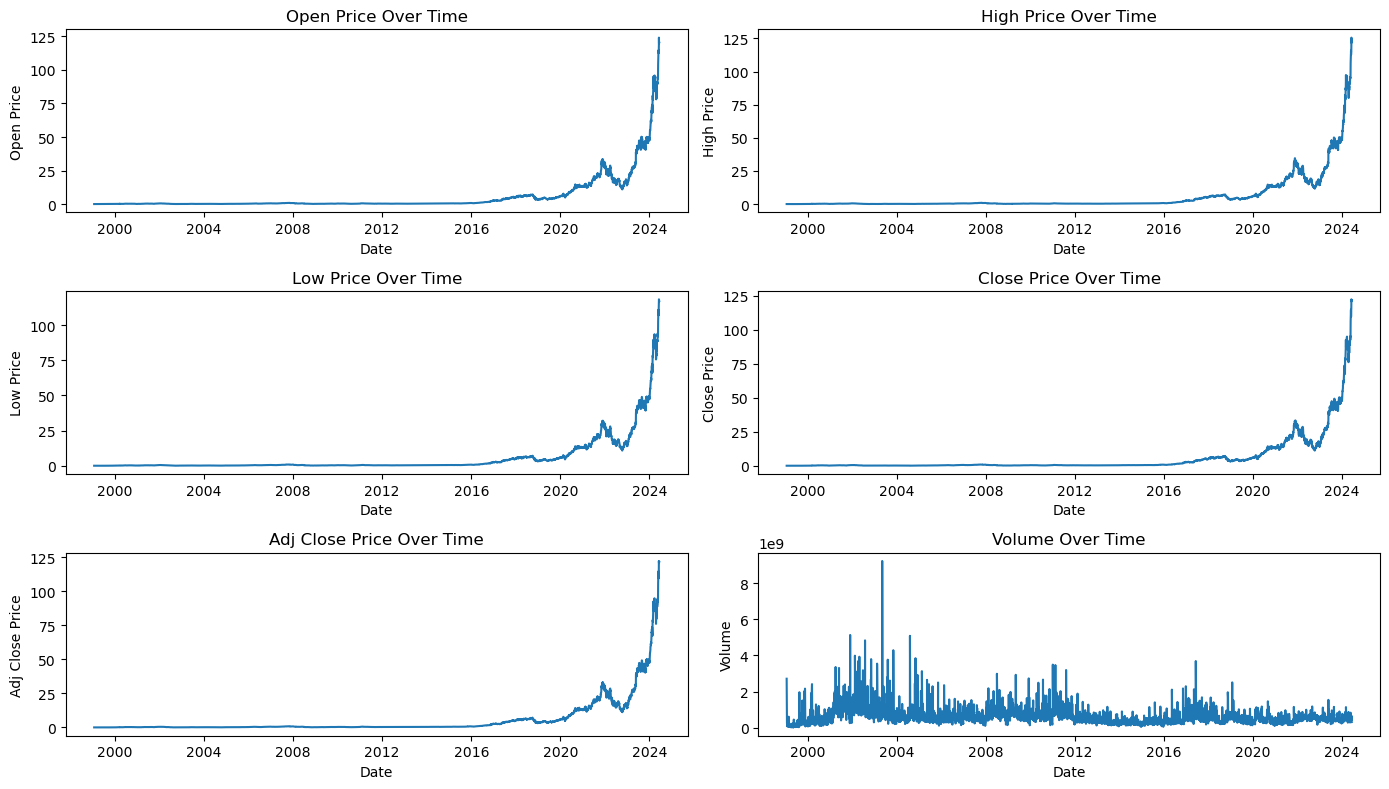

In [ ]:
import matplotlib.pyplot as plt

# Plot trends for each variable
plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
plt.plot(data['Date'], data['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')

plt.subplot(3, 2, 2)
plt.plot(data['Date'], data['High'], label='High')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')

plt.subplot(3, 2, 3)
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price Over Time')

plt.subplot(3, 2, 4)
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')

plt.subplot(3, 2, 5)
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price Over Time')

plt.subplot(3, 2, 6)
plt.plot(data['Date'], data['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')

plt.tight_layout()
plt.show()

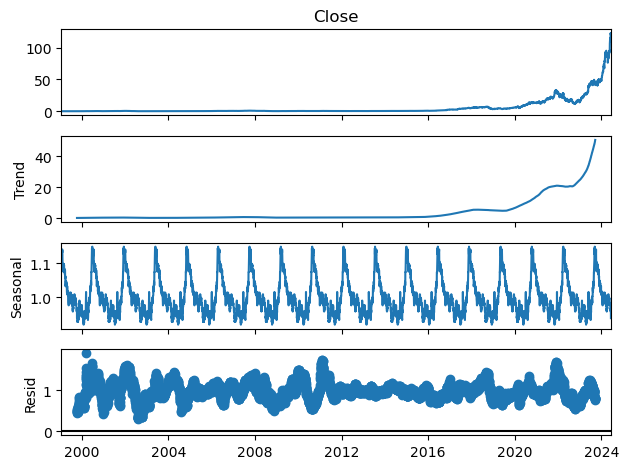

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index
data.set_index('Date', inplace=True)

# Decompose the time series
result = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Plot the decomposed components
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data['Close'], order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

model_summary

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6388
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4154.917
Date:                Wed, 12 Jun 2024   AIC                           8321.833
Time:                        22:12:27   BIC                           8362.405
Sample:                             0   HQIC                          8335.878
                               - 6388                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0230      0.003      7.212      0.000       0.017       0.029
ar.L2         -0.0623      0.002    -29.558      0.000      -0.066      -0.058
ar.L3          0.0316      0.003      9.223      0.000       0.025       0.038
ar.L4         -0.0188      0.003     -7.476      0.000      -0.024      -0.014
ar.L5          0.0858      0.003     28.259      0.000       0.080       0.092
sigma2         0.2151      0.000    440.765      0.000       0.214       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):           4694587.96
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):            4974.48   Skew:                             4.83
Prob(H) (two-sided):                  0.00   Kurtosis:                       135.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


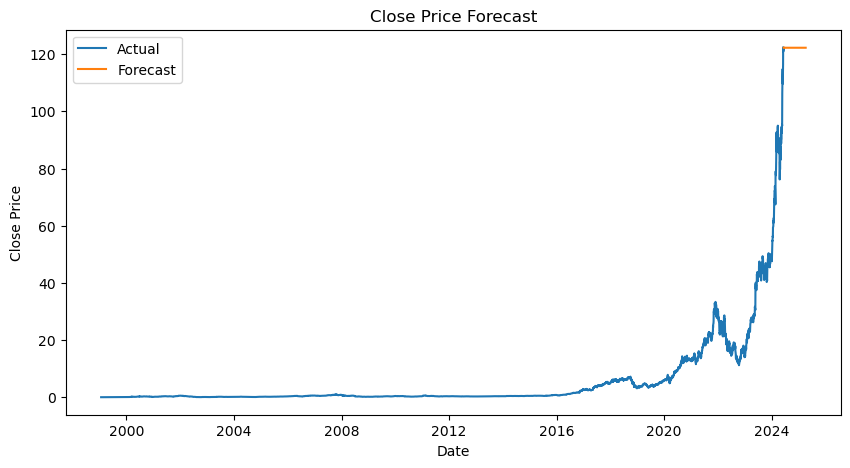

In [ ]:
# Forecast future values
forecast_steps = 300  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the actual and forecasted values
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()